# Assignment 1

# Load the data

The entire dataset can be downloaded using this link Heart Disease Data Set 

[Heart Disease Data Set](http://archive.ics.uci.edu/ml/datasets/heart+Disease)
In this project we will analyze the processed version of the  Cleaveland's foundation dataset. The data was collected in 1988. 


[Click here for a thorough description of the dataset .](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names)



In [154]:
import pandas as pd 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
         'slope', 'ca', 'thal', 'num']


data = pd.read_csv(url,names=names)


# Data Overview

In [155]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [156]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


# What columns have missing values ? 

In [158]:
for col in data.columns:
    if '?' in data[col].values.tolist():
        print(col)

ca
thal


# Dropping columns with missing values

In [159]:
data=data[data["ca"] !="?"]
data=data[data["thal"] !="?"]

In [160]:
data.shape

(297, 14)

# Selected Attributes for Data Visualization:

#### Categorical Attribute:
  "sex" : 1 = male; 0 = female

#### Ordinal Attribute: 
   "num": Diagnosis of heart disease (angiographic disease status)
            Value 0: < 50% diameter narrowing
            Value 1: > 50% diameter narrowing

#### Numerical Discrete Attribute: 
   "age"

#### Numerical Continuous Attribute: 
   "chol"

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Sex Distribution in our dataset

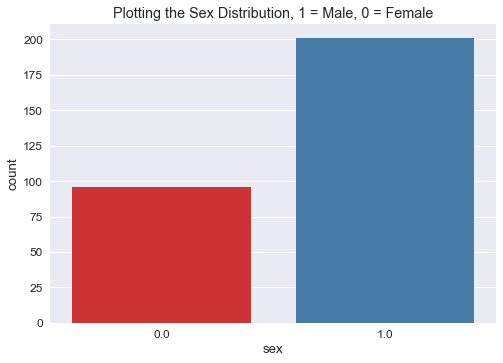

In [162]:
sns.set(font_scale=1.2)
sns.set_style("darkgrid")

fig = sns.countplot(x="sex", data=data,palette= "Set1")
_ = fig.set_title('Plotting the Sex Distribution, 1 = Male, 0 = Female')
labels = ['  Female  ', ' Male ']


### Interpretation: 
According to [the American Heart Disease Association](http://www.heart.org/HEARTORG/Conditions/HeartAttack/UnderstandYourRiskstoPreventaHeartAttack/Understand-Your-Risks-to-Prevent-a-Heart-Attack_UCM_002040_Article.jsp#.WcF0TtNJaRt) men have an increased risk of heart disease than women do and have attacks earlier in life.  


# Visualizing the feature attribute "num" which indicates the diagnosis of heart disease:

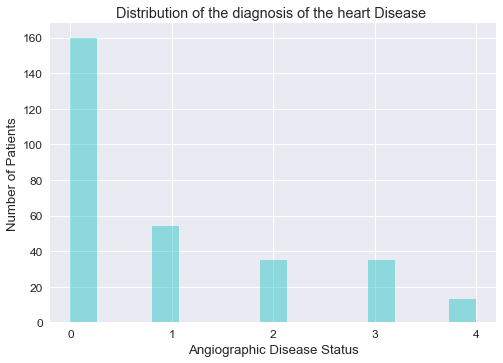

In [163]:
fig = sns.distplot(data['num'], kde=False, bins=15, color='c')
_ = fig.set_title('Distribution of the diagnosis of the heart Disease ')
_ = fig.set_xticks([0,1,2,3,4])
_ = fig.set_ylabel('Number of Patients')
_ = fig.set_xlabel('Angiographic Disease Status')



# Simplifying the interpretation of the "num" column: 

According to the dataset's [file description](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names), the "num" variable describes various stages of heart disease, 0 when the corronary arteries narrow by less than 50% and more than 1 when the narrowing percentage is more than 50%. 

Hence, for simplification purposes we will classify patients diagnosis status as:

**0** : Patient is Heart Disease Free

**1** : Patient has Heart Disease

### Transforming an ordinal variable into a categorical variable


In [164]:
data["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)


### Visualizing the newly transformed "num" target variable: 


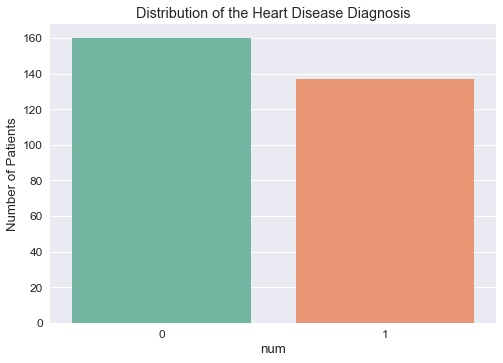

In [165]:
fig = sns.countplot(x="num", data=data, palette="Set2")
_ = fig.set_title('Distribution of the Heart Disease Diagnosis')
_ = fig.set_ylabel('Number of Patients')

# Visualizing the "age"  Attribute: 

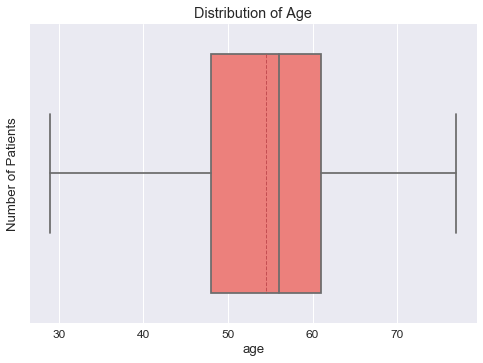

In [166]:
fig = sns.boxplot(data["age"], color="#FF6F69",  meanline=True,showmeans=True)
_ = fig.set_title('Distribution of Age')
_ = fig.set_ylabel('Number of Patients')

# Interpreting the "age" attribute: 
The American Heart Disease Association classifies **age** as a major risk factor that cannot be altered contributing to heart disease. In fact, men older than 65 represent the subpopulation with the highest risk of heart disease than the general population. 

# Visualizing the cholesterol variable: 

[MedlinePlus Magazine](https://medlineplus.gov/magazine/issues/summer12/articles/summer12pg6-7.html) classifies cholesterol levels in the following categories:

Less than 200mg/dL : **Desirable**

200-239 mg/dL	: **Borderline high**

240mg/dL and above: **High**

Moreover, the American heart disease association considers the cholesterol as a contributing risk factor to heart disease that can be altered when a healthy lifestyle is adopted by the patient. 


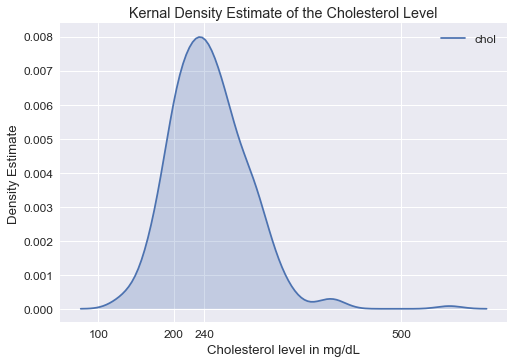

In [167]:
fig = sns.kdeplot(data['chol'],shade=True)

_ = fig.set_title('Kernal Density Estimate of the Cholesterol Level')
_ = fig.set_xticks([100,200,240,500])
_ = fig.set_xlabel('Density Estimate')

_ = fig.set_ylabel('Density Estimate')
_ = fig.set_xlabel('Cholesterol level in mg/dL')

The above kernel density estimation allows us to estimate the probability of getting a cholesterol level between 0 and any value along the xaxis. The graph show that the cleveland's dataset's highest probability of cholesterol is almost 240 mg/dL which is considered as high. 


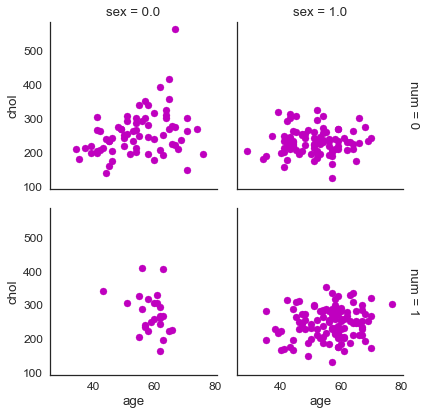

In [175]:
fig = sns.FacetGrid(data, col="sex", row="num",margin_titles=True)
fig = (fig.map(plt.scatter,"age","chol", color="m").set_titles("The pairwise relationship between age and cholesterol levels"))


*** This plot is in line with the American Heart Disease's finding, if you are a male, as you get older than 65 you are more likely to get the disease. ***

# Showcasing the correlation matrix between the various attributes:

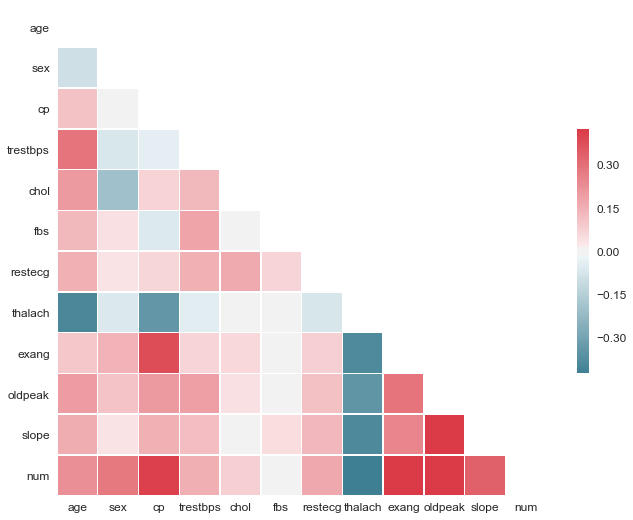

In [172]:
corr = data.corr()
  
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style("white")

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

